# Osmos Academy: Predicting with Data!
Presented by Zafarali Ahmed (http://zafarali.me) and Pierre Thodoroff


In [4]:
# import the libraries that we will use!

# numpy is the standard scientific library for manipulating arrays
# more information at http://www.numpy.org/ 
import numpy as np 

# sklearn is a machine learning library with most of the
# common algorithms implemented
# more information at scikit-learn.org/
from sklearn.linear_model import LinearRegression # the learning algorithm itself
from sklearn.cross_validation import train_test_split # data splitter
from sklearn.preprocessing import PolynomialFeatures # for more complicated examples later

# Linear Regression

## First dataset: Boston Housing Prices

In [9]:
import sklearn.datasets as datasets 
boston = datasets.load_boston()
# print the description:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

### Train-test split

In [14]:
# we need a way to train as well as evaluate the model, we can use the inbuilt method
# in sckit learn which splits our dataset into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(boston.data, boston.target, train_size=0.8)

### Training the Model

In [15]:
lr_model = LinearRegression() # creates the model
lr_model.fit(X_train, Y_train) # trains the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Testing the model: How well did we do?

In [21]:
# accuracy:
Y_predicted = lr_model.predict(X_test) 
print(np.sqrt(np.average((Y_predicted - Y_test)**2)))

5.53422026948


This means our prices are wrong by about 5.5 thousand dollars

In [23]:
# score
lr_model.score(X_test, Y_test)

0.69886072503608843

This is a score specific to the linear regression model, the closer to 1 it is the better your model fits the data

## Feature transformations

## Second dataset: Simple House Prices

In [24]:
X = np.load('./number_rooms.npy')
Y = np.load('./house_prices.npy')

Here our data is just one feature, number of rooms, so we can plot it.

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


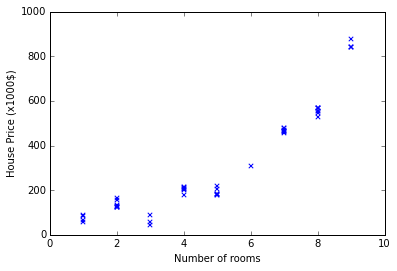

In [32]:
plt.scatter(X,Y, marker='x')
plt.xlabel('Number of rooms')
plt.ylabel('House Price (x1000$)')

Looks pretty linear, let's try to play around with some fits!

In [35]:
def fit_polynomial(X_t, Y_t, degree=1):
    feature_transformer = PolynomialFeatures(degree=degree)
    X_transformed = feature_transformer.fit_transform(X_t)
    poly_lr = LinearRegression()
    poly_lr.fit(X_transformed, Y_t)
    plt.figure('polyfit')
    plt.scatter(X_transformed, Y_t, marker='x')
    line_points = np.linspace(0,10,num=150)
    plt.plot(line_points, poly_lr.predict(line_points))
    plt.show()
    return feature_transformer, poly_lr

def score_poly_lr(X_test, Y_test, transformer, model):
    pass

In [36]:
fit_polynomial(X, Y, degree=1)

ValueError: Found arrays with inconsistent numbers of samples: [ 1 50]

(50, 2)
(50, 1)


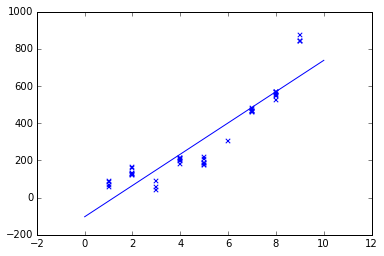

In [60]:
feature_transformer = PolynomialFeatures(degree=1)
Y_reshaped = Y.reshape(-1,1)
X_transformed = feature_transformer.fit_transform(X.reshape(-1,1))
poly_lr = LinearRegression()
poly_lr.fit(X_transformed, Y.reshape(-1,1))
plt.figure('polyfit')
print X_transformed.shape
print Y_reshaped.shape
plt.scatter(X_transformed[:,1], Y_reshaped, marker='x')
line_points = feature_transformer.transform(np.linspace(0,10,num=150).reshape(-1,1))
plt.plot(line_points[:,1], poly_lr.predict(line_points))
plt.show()
